In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [ ]:
data = pd.read_excel('NGA_Data_Full.xlsx')
data['logPGA']= np.log10(data['PGA'])
data['logRrup']= np.log10(data['Rrup'])
data['logVs30']= np.log10(data['Vs30'])
#data['Mw2']= np.power((data['Mw']),2)
#con=data['FM']==1
#tt=data[con]
data.head(10)

,PGA,PGV,Mw,FM,Vs30,Rrup,logPGA,logRrup,logVs30
0,0.052746,8.5444,7.36,3,316.46,117.75,-1.277810,2.070961,2.500319
1,0.058666,7.1982,6.19,1,408.93,17.64,-1.231614,1.246499,2.611649
2,0.378930,23.5450,6.19,1,289.56,9.58,-0.421441,0.981366,2.461739
3,0.247240,11.6330,6.19,1,256.82,12.90,-0.606881,1.110590,2.409629
4,0.287260,16.5210,6.19,1,527.92,15.96,-0.541725,1.203033,2.722568
5,0.067895,3.7417,5.33,3,477.22,22.94,-1.168162,1.360593,2.678719
6,0.166890,5.0801,5.33,3,667.13,20.24,-0.777570,1.306211,2.824210
7,0.031274,5.5043,6.61,3,280.56,55.20,-1.504817,1.741939,2.448026
8,0.071213,4.7830,6.61,3,235.00,61.79,-1.147441,1.790918,2.371068
9,0.286720,22.1830,6.61,3,450.28,22.63,-0.542542,1.354685,2.653483


In [ ]:
X = data.drop(['PGA','Rrup','Vs30', 'logPGA', 'PGV'], axis=1)
y=data['logPGA']
Y=pd.DataFrame(y)
X.head()

,Mw,FM,logRrup,logVs30
0,7.36,3,2.070961,2.500319
1,6.19,1,1.246499,2.611649
2,6.19,1,0.981366,2.461739
3,6.19,1,1.110590,2.409629
4,6.19,1,1.203033,2.722568


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

In [ ]:
from sklearn import metrics
dtree=DecisionTreeRegressor(max_depth=9, splitter="best", min_samples_split = 42, min_samples_leaf= 11, max_features= "auto")
dtree.fit(xtrain,ytrain)
ypred = dtree.predict(xtest)
R2= metrics.r2_score(ytest, ypred)
print("R2 is:", R2)

R2 is: 0.898161911482278


In [ ]:
from array import array 
res_pred = array("f", ypred)

ytest= ytest.to_numpy()

from array import array
res = array("f", ytest)

In [ ]:
diff = np.subtract(res_pred, res) 
ss= np.mean(diff)
print("Mean of Residuals is:", ss)

Mean of Residuals is: -0.0030574317


In [ ]:
import math
RSS = np.sum(np.square(diff))
RSE = math.sqrt(RSS / (len(diff) - 1))
print("Standard Deviation is:", RSE)

Standard Deviation is: 0.34192181867581845


In [ ]:
from sklearn import metrics
import math
MS= metrics.mean_squared_error(ytest, ypred)
print("Mean Squared Error is:", MS)

Mean Squared Error is: 0.11688178456047238


In [ ]:
Residuals_df1=pd.DataFrame(diff)
Residuals_df1.describe()
Residuals_df1.rename( columns={0 :'Residuals'}, inplace=True )
Residuals_df1.describe(include = 'all')

,Residuals
count,4067.000000
mean,-0.003057
std,0.341908
min,-1.254254
25%,-0.229976
50%,-0.005214
75%,0.216077
max,1.257094


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.786534 to fit


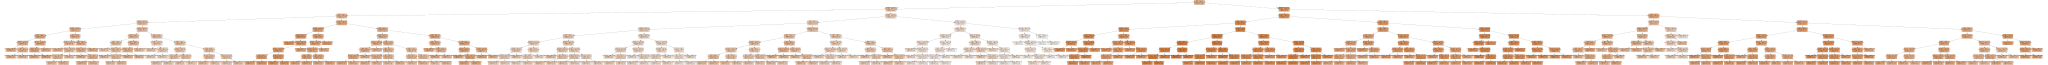

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dtree, impurity= bool, out_file=None,feature_names=X.columns, filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")
graph

# Total

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X) 

In [ ]:
ypred_all = dtree.predict(X)
#ypred_all

from array import array 
ypred_array_all = array("f", ypred_all)
ypred_array_all
Y= Y.to_numpy()
from array import array
Y_all = array("f", Y)
Y_all

diffT = np.subtract(ypred_array_all, Y_all) 

import math
RSST = np.sum(np.square(diffT))
RSET = math.sqrt(RSST / (len(Y) - 1))
print("Standard Deviation is:", RSET)

Standard Deviation is: 0.32205241904485366
